In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["LANGCHAIN_PROJECT"] = "GPT_doyoutrustme"


In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

# ChatOpenAI 모델 초기화
model = ChatOpenAI()

# 프롬프트 템플릿 생성
prompt = PromptTemplate.from_template("{topic}에 대해 3문장으로 설명해줘.")

# 체인 구성
chain = prompt | model | StrOutputParser()

# 체인 실행
result = chain.invoke({"topic": "인공지능"})
print(result)


인공지능은 인간의 학습과 추론 능력을 기계적으로 구현한 기술로, 사람처럼 학습하고 문제를 해결할 수 있습니다. 이를 통해 컴퓨터 시스템이 스스로 학습하고 판단하는 능력을 갖추게 됩니다. 현재는 음성인식, 이미지 분석, 자율주행 등 다양한 분야에서 활용되고 있습니다.


In [3]:
from langchain_openai import ChatOpenAI

# ChatOpenAI 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)


In [4]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)
print(f"[답변]: {response.content}")


[답변]: 대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 인구와 다양한 명소를 자랑하는 도시입니다.


In [5]:
print(response)
print("\\n내용:", response.content)
print("\\n메타데이터:", response.response_metadata)


content='대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 인구와 다양한 명소를 자랑하는 도시입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 16, 'total_tokens': 52}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_25624ae3a5', 'finish_reason': 'stop', 'logprobs': None} id='run-1bbad4ca-fd8c-44cd-9e44-28e70d0b634e-0' usage_metadata={'input_tokens': 16, 'output_tokens': 36, 'total_tokens': 52}
\n내용: 대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 인구와 다양한 명소를 자랑하는 도시입니다.
\n메타데이터: {'token_usage': {'completion_tokens': 36, 'prompt_tokens': 16, 'total_tokens': 52}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_25624ae3a5', 'finish_reason': 'stop', 'logprobs': None}


In [6]:
llm_with_logprob = ChatOpenAI(
    temperature=0.1,
    max_tokens=2048,
    model_name="gpt-3.5-turbo",
).bind(logprobs=True)

response = llm_with_logprob.invoke(question)
print(response.response_metadata['logprobs'])


{'content': [{'token': '대', 'bytes': [235, 140, 128], 'logprob': -0.047983073, 'top_logprobs': []}, {'token': '한', 'bytes': [237, 149, 156], 'logprob': -1.9361265e-07, 'top_logprobs': []}, {'token': '\\xeb\\xaf', 'bytes': [235, 175], 'logprob': -1.6240566e-06, 'top_logprobs': []}, {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []}, {'token': '\\xea\\xb5', 'bytes': [234, 181], 'logprob': -3.1281633e-07, 'top_logprobs': []}, {'token': '\\xad', 'bytes': [173], 'logprob': 0.0, 'top_logprobs': []}, {'token': '의', 'bytes': [236, 157, 152], 'logprob': -4.723352e-06, 'top_logprobs': []}, {'token': ' 수', 'bytes': [32, 236, 136, 152], 'logprob': -6.704273e-07, 'top_logprobs': []}, {'token': '도', 'bytes': [235, 143, 132], 'logprob': -5.5122365e-07, 'top_logprobs': []}, {'token': '는', 'bytes': [235, 138, 148], 'logprob': -1.9361265e-07, 'top_logprobs': []}, {'token': ' 서', 'bytes': [32, 236, 132, 156], 'logprob': -4.723352e-06, 'top_logprobs': []}, {'token': '\\xec\\x9a', 'byte

In [7]:
from langchain_teddynote.messages import stream_response

answer = llm.stream("대한민국의 아름다운 관광지 10곳을 알려주세요!")
stream_response(answer)


물론입니다! 대한민국에는 아름다운 관광지가 많이 있습니다. 다음은 그 중에서도 특히 추천할 만한 10곳입니다:

1. **경복궁 (서울)**: 조선 시대의 대표적인 궁궐로, 한국의 역사와 문화를 느낄 수 있는 곳입니다.

2. **부산 해운대 해수욕장**: 대한민국에서 가장 유명한 해수욕장 중 하나로, 아름다운 해변과 다양한 해양 스포츠를 즐길 수 있습니다.

3. **제주도**: 한라산, 성산 일출봉, 만장굴 등 자연 경관이 뛰어난 곳으로, 다양한 액티비티와 맛있는 음식도 즐길 수 있습니다.

4. **경주**: 신라 시대의 수도로, 불국사, 석굴암, 첨성대 등 역사적인 유적지가 많습니다.

5. **설악산 국립공원**: 아름다운 산과 계곡, 그리고 다양한 등산 코스로 유명한 곳입니다.

6. **남이섬 (춘천)**: 드라마 촬영지로 유명하며, 아름다운 자연 경관과 다양한 액티비티를 즐길 수 있습니다.

7. **안동 하회마을**: 전통 한옥 마을로, 한국의 전통 문화를 체험할 수 있는 곳입니다.

8. **전주 한옥마을**: 전통 한옥이 모여 있는 마을로, 전통 음식과 문화를 체험할 수 있습니다.

9. **순천만 습지**: 다양한 생태계와 아름다운 자연 경관을 자랑하는 곳으로, 철새 관찰과 자연 탐방을 즐길 수 있습니다.

10. **강릉 경포대**: 아름다운 해변과 호수, 그리고 다양한 문화 유적지가 있는 곳으로, 여름철 피서지로 인기가 많습니다.

이 외에도 대한민국에는 많은 아름다운 관광지가 있으니, 기회가 된다면 여러 곳을 방문해 보세요!


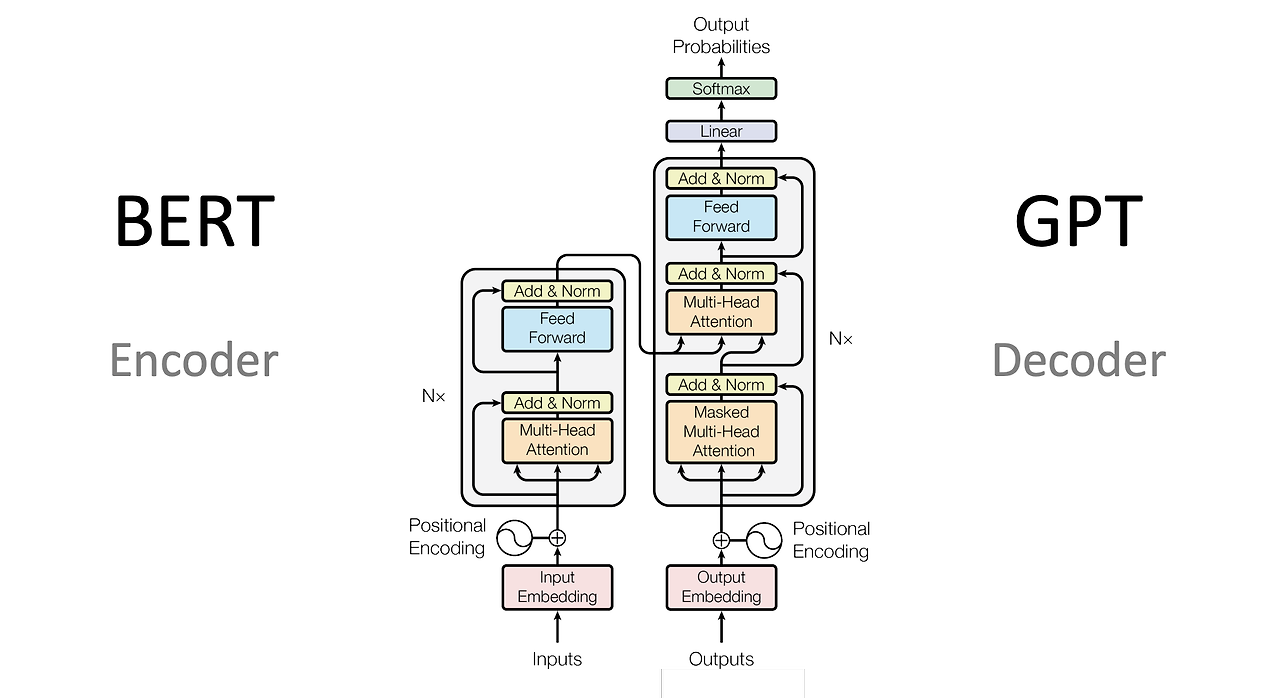

이미지는 BERT와 GPT의 구조를 비교하는 다이어그램입니다. 

왼쪽에는 "BERT"라는 제목이 있고, 그 아래에는 "Encoder"라는 설명이 있습니다. BERT의 구조는 여러 층으로 구성된 인코더 블록을 보여줍니다. 각 인코더 블록은 "Add & Norm", "Feed Forward", "Multi-Head Attention" 모듈로 구성되어 있습니다. 입력은 "Input Embedding"과 "Positional Encoding"을 거쳐 인코더 블록으로 들어갑니다.

오른쪽에는 "GPT"라는 제목이 있고, 그 아래에는 "Decoder"라는 설명이 있습니다. GPT의 구조는 여러 층으로 구성된 디코더 블록을 보여줍니다. 각 디코더 블록은 "Add & Norm", "Feed Forward", "Masked Multi-Head Attention" 모듈로 구성되어 있습니다. 출력은 "Output Embedding"과 "Positional Encoding"을 거쳐 디코더 블록으로 들어갑니다. 마지막으로 "Linear"와 "Softmax"를 거쳐 출력 확률이 계산됩니다.

두 구조 모두 여러 층(Nx)으로 구성되어 있으며, 입력과 출력의 임베딩 및 위치 인코딩을 사용합니다. BERT는 인코더 구조를, GPT는 디코더 구조를 사용합니다.

In [15]:
from langchain_teddynote.models import MultiModal

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)

# 이미지 URL로부터 질의
IMAGE_URL = "https://img1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/aPda/image/9MwX8YqNCz1s2-OnfBPGUIblnBE.png"
answer = multimodal_llm.stream(IMAGE_URL)
stream_response(answer)



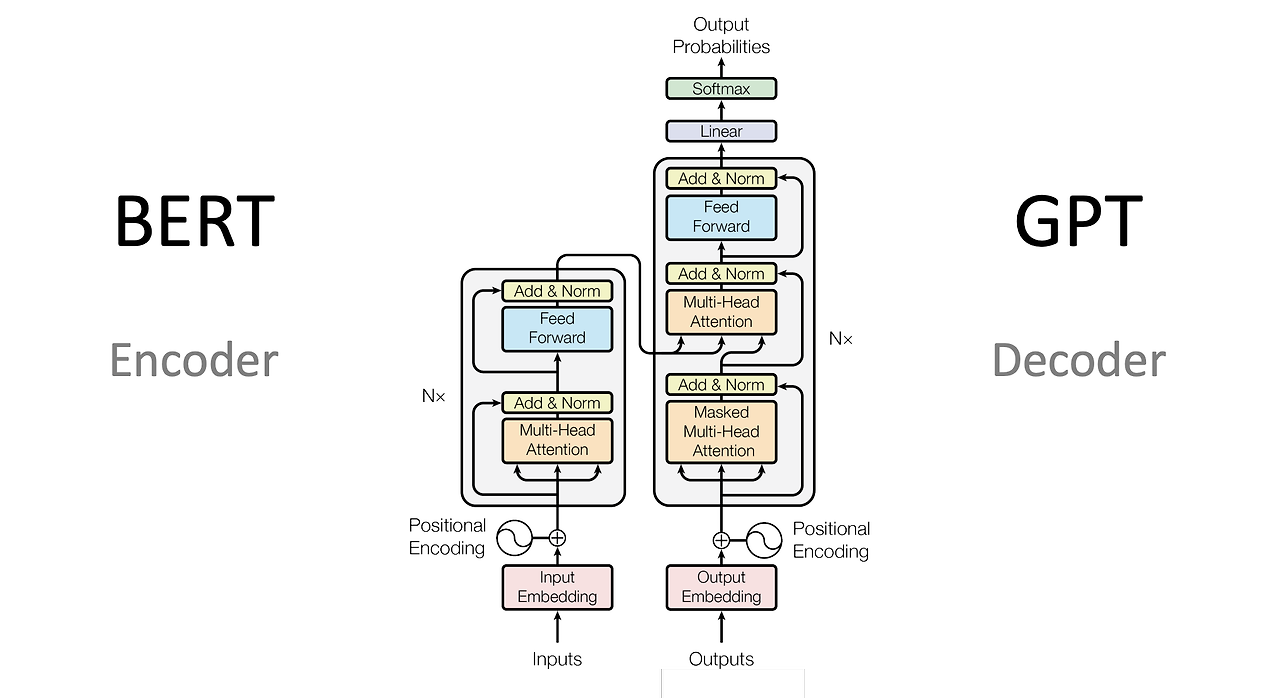

Transformer 모델은 자연어 처리(NLP)에서 혁신적인 변화를 가져온 모델로, 특히 번역, 요약, 질의응답 등 다양한 NLP 작업에서 뛰어난 성능을 보입니다. Transformer 모델의 구조와 작동 원리에 대해 자세히 설명드리겠습니다.

### Transformer 모델의 구조

Transformer 모델은 크게 **인코더(Encoder)**와 **디코더(Decoder)** 두 부분으로 나뉩니다. 인코더는 입력 시퀀스를 받아 내부 표현으로 변환하고, 디코더는 이 내부 표현을 받아 출력 시퀀스를 생성합니다. BERT와 GPT는 Transformer의 변형으로, 각각 인코더와 디코더 부분만을 사용합니다.

#### 1. 인코더(Encoder)
인코더는 입력 시퀀스를 받아들이고, 이를 고차원 벡터로 변환합니다. 인코더는 여러 개의 동일한 레이어로 구성되며, 각 레이어는 두 개의 주요 서브 레이어로 이루어져 있습니다:
- **멀티헤드 어텐션(Multi-Head Attention)**: 입력 시퀀스의 각 단어가 다른 단어들과 어떻게 관련되어 있는지를 학습합니다.
- **피드 포워드 네트워크(Feed Forward Network)**: 각 단어의 표현을 독립적으로 변환합니다.

각 서브 레이어에는 **잔차 연결(Residual Connection)**과 **정규화(Normalization)**가 적용됩니다.

#### 2. 디코더(Decoder)
디코더는 인코더의 출력과 이전 디코더의 출력을 받아 최종 출력 시퀀스를 생성합니다. 디코더 역시 여러 개의 동일한 레이어로 구성되며, 각 레이어는 세 개의 주요 서브 레이어로 이루어져 있습니다:
- **마스크드 멀티헤드 어텐션(Masked Multi-Head Attention)**: 디코더의 이전 출력 단어들이 현재 단어를 예측하는 데 영향을 미치지 않도록 마스킹합니다.
- **멀티헤드 어텐션(Multi-Head Attention)**: 인코더의 출력과 디코더의 입력을 결합하여 현재 단어를 예측합니다.
- **피드 포워

In [17]:
system_prompt = """당신은 자연어 처리(NLP)의 Transformer 모델을 전문적으로 설명하는 AI 어시스턴트입니다. Transformer의 구조, 작동 원리, 응용 분야 등에 대해 깊이 있는 지식을 가지고 있으며, 이를 쉽고 명확하게 설명할 수 있습니다. 사용자의 질문에 대해 정확하고 친절하게 답변해주세요."""

user_prompt = """Transformer 모델에 대해 설명해주세요. 특히 그 구조와 작동 원리에 대해 자세히 알고 싶습니다."""


multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

IMAGE_URL = "https://img1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/aPda/image/9MwX8YqNCz1s2-OnfBPGUIblnBE.png"
answer = multimodal_llm_with_prompt .stream(IMAGE_URL)
stream_response(answer)
